# Learning functions

In [1]:
try:
    # in colab
    import google.colab
    print('In colab, downloading LOTlib3')
    !git clone https://github.com/piantado/LOTlib3
except:
    # not in colab
    print('Not in colab!')

Not in colab!


## Imports

First we need to import a bunch of stuff:

In [13]:
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt

In [101]:
from LOTlib3.Miscellaneous import q, random
from LOTlib3.Grammar import Grammar
from LOTlib3.DataAndObjects import FunctionData, Obj
from LOTlib3.Hypotheses.LOTHypothesis import LOTHypothesis
from LOTlib3.Hypotheses.Likelihoods.BinaryLikelihood import BinaryLikelihood
from LOTlib3.Eval import primitive
from LOTlib3.Miscellaneous import qq
from LOTlib3.TopN import TopN
from LOTlib3.Samplers.MetropolisHastings import MetropolisHastingsSampler

## The model

The aim here is to define a language that recovers the explicit form for a mathematical function most likely to have generated a certain set of input-output pairs. 

For instance, to start with we might want: addition, product, power, log, exp.

If we want to make it fancier, we can add recursion up to a level (which allows us to do e.g. series)
    
> __**AIMS**__ 
> - Pick a set of mathematical primitives that seem likely
> - Define a grammar
> - Define likelihood, e.g., sum of squares minimization
> - Run inference algo on the example datasets below!

Some hidden data to recover (Don't look at it yet!)

In [45]:
x = np.linspace(1, 20, 30)

y = 1 - np.log(x) + np.random.normal(scale=0.1, size=len(x))
f1 = np.array(list(zip(x, y)))

y = 1 + 3 * x**2 + np.random.normal(scale=0.1, size=len(x))
f2 = np.array(list(zip(x, y)))

y = 4 * x - 0.5 * x**2 + np.random.normal(scale=0.1, size=len(x))
f3 = np.array(list(zip(x, y)))

Data: 
array([[ 1.        ,  0.96693628],
       [ 1.65517241,  0.44488931],
       [ 2.31034483,  0.11111997],
       [ 2.96551724, -0.05388751],
       [ 3.62068966, -0.08770159],
       [ 4.27586207, -0.34701368],
       [ 4.93103448, -0.5312597 ],
       [ 5.5862069 , -0.56654964],
       [ 6.24137931, -0.98309806],
       [ 6.89655172, -0.87024759],
       [ 7.55172414, -1.02468311],
       [ 8.20689655, -1.07690071],
       [ 8.86206897, -1.3229659 ],
       [ 9.51724138, -1.26628302],
       [10.17241379, -1.26076366],
       [10.82758621, -1.29232939],
       [11.48275862, -1.47545188],
       [12.13793103, -1.53730544],
       [12.79310345, -1.72121669],
       [13.44827586, -1.59430107],
       [14.10344828, -1.6440229 ],
       [14.75862069, -1.74346587],
       [15.4137931 , -1.89063419],
       [16.06896552, -1.87860771],
       [16.72413793, -1.73337155],
       [17.37931034, -1.74285824],
       [18.03448276, -1.82462328],
       [18.68965517, -2.13664592],
       [19.34

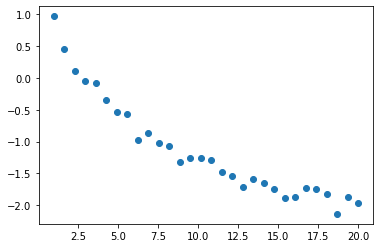



Data: 
array([[1.00000000e+00, 3.71191585e+00],
       [1.65517241e+00, 9.24602588e+00],
       [2.31034483e+00, 1.71111810e+01],
       [2.96551724e+00, 2.74461376e+01],
       [3.62068966e+00, 4.04248405e+01],
       [4.27586207e+00, 5.58883272e+01],
       [4.93103448e+00, 7.39602616e+01],
       [5.58620690e+00, 9.45716098e+01],
       [6.24137931e+00, 1.17768463e+02],
       [6.89655172e+00, 1.43745608e+02],
       [7.55172414e+00, 1.72014815e+02],
       [8.20689655e+00, 2.03113066e+02],
       [8.86206897e+00, 2.36586296e+02],
       [9.51724138e+00, 2.72592478e+02],
       [1.01724138e+01, 3.11500578e+02],
       [1.08275862e+01, 3.52680831e+02],
       [1.14827586e+01, 3.96347343e+02],
       [1.21379310e+01, 4.42937224e+02],
       [1.27931034e+01, 4.91952665e+02],
       [1.34482759e+01, 5.43415913e+02],
       [1.41034483e+01, 5.97790718e+02],
       [1.47586207e+01, 6.54449584e+02],
       [1.54137931e+01, 7.13693393e+02],
       [1.60689655e+01, 7.75636386e+02],
       

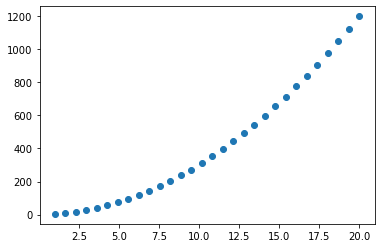



Data: 
array([[   1.        ,    3.4938151 ],
       [   1.65517241,    5.44628788],
       [   2.31034483,    6.53998577],
       [   2.96551724,    7.67421996],
       [   3.62068966,    7.89516258],
       [   4.27586207,    8.02252067],
       [   4.93103448,    7.55957521],
       [   5.5862069 ,    6.68554562],
       [   6.24137931,    5.49661335],
       [   6.89655172,    3.78650889],
       [   7.55172414,    1.76357834],
       [   8.20689655,   -0.95288503],
       [   8.86206897,   -3.56660826],
       [   9.51724138,   -7.30943747],
       [  10.17241379,  -11.0152518 ],
       [  10.82758621,  -15.41306886],
       [  11.48275862,  -20.02607231],
       [  12.13793103,  -25.05703701],
       [  12.79310345,  -30.66109506],
       [  13.44827586,  -36.58291196],
       [  14.10344828,  -43.09300853],
       [  14.75862069,  -49.80759178],
       [  15.4137931 ,  -57.20869912],
       [  16.06896552,  -64.76773707],
       [  16.72413793,  -72.90556438],
       [  17.379

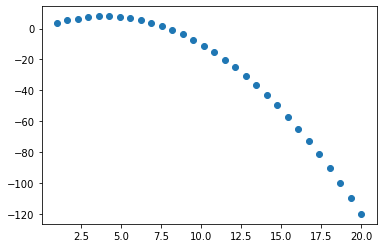

In [46]:
for f in [f1, f2, f3]:
    print('Data: ')
    pprint(f)
    plt.scatter(*f.T)
    plt.show()
    print('\n')